In [1]:
# TV, radio, and newspaper columns are the budgets associated with that medium of advertising

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Advertising.csv', index_col=0 );

In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

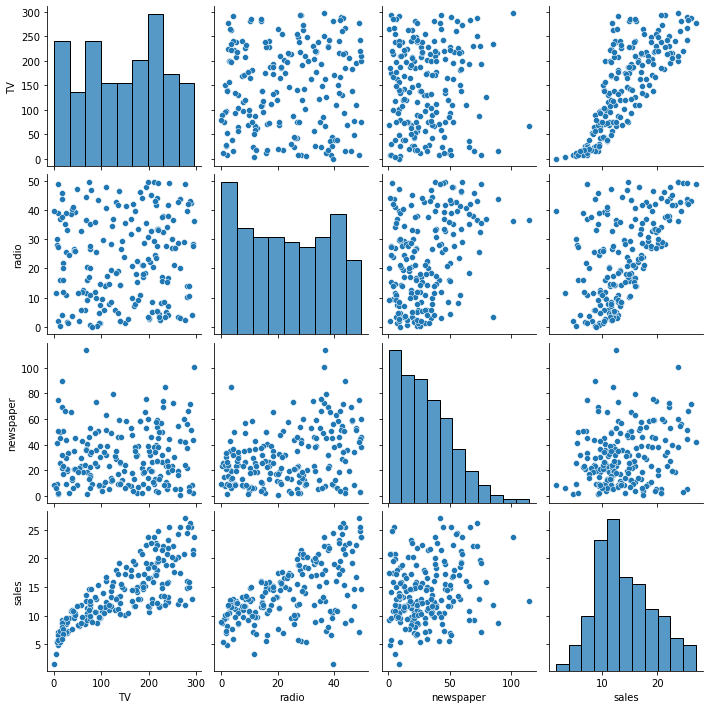

In [9]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

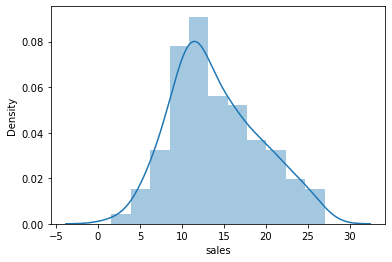

In [10]:
sns.distplot(df['sales'])

<AxesSubplot:>

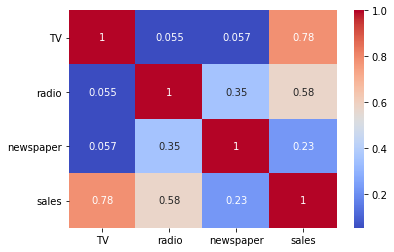

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
X = df[['TV', 'radio', 'newspaper']]

In [14]:
y = df['sales']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

3.2286202507351707


In [21]:
lm.coef_

array([0.04481761, 0.1802955 , 0.00117012])

In [22]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [23]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [24]:
cdf

,Coeff
TV,0.044818
radio,0.180295
newspaper,0.001170


In [25]:
predictions = lm.predict(X_test)

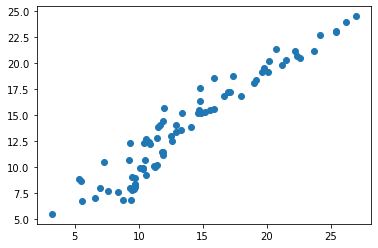

In [26]:
plt.scatter(y_test, predictions)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

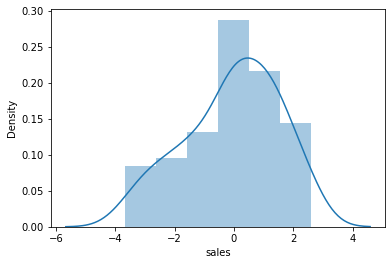

In [27]:
sns.distplot((y_test-predictions))

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test, predictions)

1.2958083354169347

In [30]:
metrics.mean_squared_error(y_test, predictions)

2.544635197264287

In [31]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.5951912729401097